In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
import cv2
import numpy as np

from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
import pickle

In [2]:

project_path = 'make_model'
name_number = '1'
checkpoint_path = project_path + '/checkpoints/' + name_number + '.h5'
logfile_path = project_path + '/log/' + name_number +'.csv'

cp = ModelCheckpoint(filepath = checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)
csv_logger = CSVLogger(filename= logfile_path, append=True)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
''' 3차원으로 만들어서 실행할 때 '''
X_train = np.expand_dims( X_train, axis=0 ).reshape(-1,28,28,1)
X_test = np.expand_dims( X_test, axis=0 ).reshape(-1,28,28,1)
print( X_test.shape, X_train.shape )

(10000, 28, 28, 1) (60000, 28, 28, 1)


In [6]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [9]:
# 3차원 모델 하나 더 생성해봄
new2DModel = keras.Sequential([
        layers.Conv2D(32, (3,3), activation=layers.LeakyReLU(alpha=0.1), input_shape = (28,28,1) ),
        layers.Conv2D(32, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(64, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(64, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(128, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(128, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(256, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(256, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Flatten(),
        layers.Dense(128, activation=layers.LeakyReLU(alpha=0.1)),
        layers.Dense(10, activation='softmax')
    ])
new2DModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
new2DModel.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 18, 18, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 256)      

In [10]:
model_history = new2DModel.fit(X_train, y_train, batch_size=512, validation_data=(X_test, y_test), callbacks=[cp, csv_logger], epochs=10)

Epoch 1/10
117/118 [============================>.] - ETA: 0s - loss: 0.4696 - accuracy: 0.8663
Epoch 00001: val_accuracy did not improve from 0.97940
118/118 [==============================] - 18s 148ms/step - loss: 0.4691 - accuracy: 0.8665 - val_loss: 0.0779 - val_accuracy: 0.9747
Epoch 2/10
117/118 [============================>.] - ETA: 0s - loss: 0.0710 - accuracy: 0.9778
Epoch 00002: val_accuracy improved from 0.97940 to 0.98450, saving model to make_model/checkpoints/1.h5
118/118 [==============================] - 18s 150ms/step - loss: 0.0709 - accuracy: 0.9778 - val_loss: 0.0478 - val_accuracy: 0.9845
Epoch 3/10
117/118 [============================>.] - ETA: 0s - loss: 0.0500 - accuracy: 0.9849
Epoch 00003: val_accuracy improved from 0.98450 to 0.98550, saving model to make_model/checkpoints/1.h5
118/118 [==============================] - 18s 151ms/step - loss: 0.0499 - accuracy: 0.9849 - val_loss: 0.0453 - val_accuracy: 0.9855
Epoch 4/10
117/118 [===========================

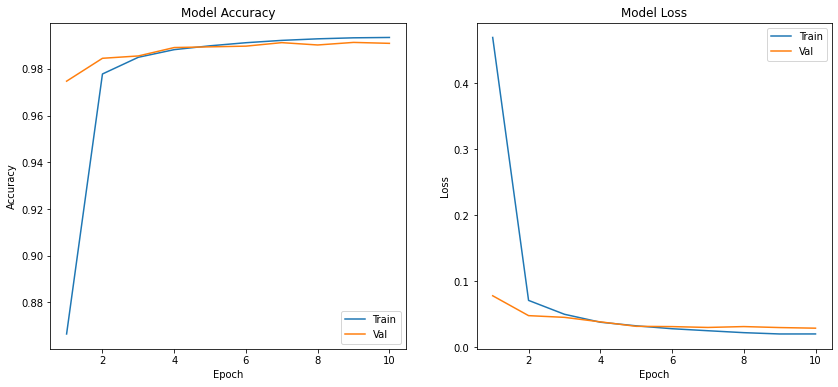

In [11]:

def learning_curve(history, epoch):
    # 정확도 차트
    epoch_range = np.arange(1, epoch + 1 )

    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Val'])
    
    plt.subplot(1,2,2)
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Val'])
    plt.show()

learning_curve(model_history, 10)

In [24]:

project_path = 'make_model'
name_number = '1'
checkpoint_path = project_path + '/checkpoints/' + name_number + '.h5'
logfile_path = project_path + '/log/' + name_number +'.csv'

cp = ModelCheckpoint(filepath = checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)
csv_logger = CSVLogger(filename= logfile_path, append=True)

for idx, i in enumerate([32,64,128,256]):
    new2DModel = keras.Sequential([
        layers.Conv2D(32, (3,3), activation=layers.LeakyReLU(alpha=0.1), input_shape = (28,28,1) ),
        layers.Conv2D(32, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(64, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(64, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(128, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(128, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(256, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.SpatialDropout2D(0.1),
        layers.Conv2D(256, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.SpatialDropout2D(0.1),
        layers.Conv2D(512, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.SpatialDropout2D(0.1),
        layers.Conv2D(512, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Flatten(),
        layers.Dense(128, activation=layers.LeakyReLU(alpha=0.1)),
        layers.Dense(10, activation='softmax')
    ])
    new2DModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    

    name_number = str( int(name_number) + idx )
    checkpoint_path = project_path + '/checkpoints/' + name_number + '.h5'
    logfile_path = project_path + '/log/' + name_number +'.csv'
    cp = ModelCheckpoint(filepath = checkpoint_path, monitor='val_accuracy', save_best_only=False, verbose=1)
    csv_logger = CSVLogger(filename= logfile_path, append=True)

    model_history = new2DModel.fit(X_train, y_train, batch_size=i, validation_data=(X_test, y_test), callbacks=[cp, csv_logger], epochs=10)

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 1533.0020 - accuracy: 0.7327
Epoch 00001: saving model to make_model/checkpoints/1.h5
1875/1875 [==============================] - 48s 25ms/step - loss: 1532.1974 - accuracy: 0.7325 - val_loss: 5.5899 - val_accuracy: 0.4050
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 8.3089 - accuracy: 0.5329
Epoch 00002: saving model to make_model/checkpoints/1.h5
1875/1875 [==============================] - 47s 25ms/step - loss: 8.3059 - accuracy: 0.5330 - val_loss: 4.5171 - val_accuracy: 0.7477
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 2.2634 - accuracy: 0.7452
Epoch 00003: saving model to make_model/checkpoints/1.h5
1875/1875 [==============================] - 47s 25ms/step - loss: 2.2634 - accuracy: 0.7452 - val_loss: 0.5138 - val_accuracy: 0.8881
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 3.0326 - accuracy: 0.7829
Epoch 00004: saving model 

In [25]:
%cp -r "/content/make_model" "/content/drive/MyDrive/개인 공부/MNIST_toy/make_model2"

In [26]:
project_path = 'make_model2'
name_number = '1'
checkpoint_path = project_path + '/checkpoints/' + name_number + '.h5'
logfile_path = project_path + '/log/' + name_number +'.csv'

cp = ModelCheckpoint(filepath = checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)
csv_logger = CSVLogger(filename= logfile_path, append=True)

for idx, i in enumerate([32,64,128,256,512,1024]):
    new2DModel = keras.Sequential([
        layers.Conv2D(64, (3,3), activation=layers.LeakyReLU(alpha=0.1), input_shape = (28,28,1) ),
        layers.Conv2D(64, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(64, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(64, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.SpatialDropout2D(0.1),
        layers.Conv2D(128, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(128, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(128, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Conv2D(256, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.SpatialDropout2D(0.1),
        layers.Conv2D(256, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.SpatialDropout2D(0.1),
        layers.Conv2D(256, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.SpatialDropout2D(0.1),
        layers.Conv2D(512, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.SpatialDropout2D(0.1),
        layers.Conv2D(512, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.SpatialDropout2D(0.1),
        layers.Conv2D(512, (3,3), activation=layers.LeakyReLU(alpha=0.1)),
        layers.Flatten(),
        layers.Dense(128, activation=layers.LeakyReLU(alpha=0.1)),
        layers.Dense(10, activation='softmax')
    ])
    new2DModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    

    name_number = str( idx )
    checkpoint_path = project_path + '/checkpoints/' + name_number + '.h5'
    logfile_path = project_path + '/log/' + name_number +'.csv'
    cp = ModelCheckpoint(filepath = checkpoint_path, monitor='val_accuracy', save_best_only=False, verbose=1)
    csv_logger = CSVLogger(filename= logfile_path, append=True)

    model_history = new2DModel.fit(X_train, y_train, batch_size=i, validation_data=(X_test, y_test), callbacks=[cp, csv_logger], epochs=10)

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 95254.9766 - accuracy: 0.1132
Epoch 00001: saving model to make_model2/checkpoints/1.h5
1875/1875 [==============================] - 53s 27ms/step - loss: 95204.2891 - accuracy: 0.1132 - val_loss: 65.4982 - val_accuracy: 0.1169
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 158.2997 - accuracy: 0.1300
Epoch 00002: saving model to make_model2/checkpoints/1.h5
1875/1875 [==============================] - 49s 26ms/step - loss: 158.2997 - accuracy: 0.1300 - val_loss: 11.5640 - val_accuracy: 0.2023
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 50.3598 - accuracy: 0.1398
Epoch 00003: saving model to make_model2/checkpoints/1.h5
1875/1875 [==============================] - 50s 26ms/step - loss: 50.3598 - accuracy: 0.1398 - val_loss: 42.6299 - val_accuracy: 0.1254
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 19.3936 - accuracy: 0.1525
Epoch 00004

In [27]:
%cp -r "/content/make_model2" "/content/drive/MyDrive/개인 공부/MNIST_toy/make_model3"